In [1]:
from Finance.UtilityFunctions import CRRA, CARA
from MacroModels.NeoclassicalModel import RamseyModel
from MacroModels.ProductionFunctions import CobbDouglas, CES
from MacroModels.ExogenousVariables import ExogenousFunctions
from MacroModels.GrowthFunctions import compounded_growth, identity

cobb_douglas = CobbDouglas(alpha=0.3)

time_horizon = 3

starting_pop = 100
labor_growth_rate = 0.04
labor_growth_function = lambda x: compounded_growth(x, labor_growth_rate)

exogenous_variables = ExogenousFunctions(starting_pop=starting_pop, starting_hicks=1, starting_solow=1,
                                                 starting_harrods=1, hicks_progress_function=identity,
                                                 solow_progress_function=identity, harrods_progress_function=identity,
                                                 time_horizon=time_horizon, labor_growth_function=labor_growth_function)

utility_function = CRRA(params=2)

utility_function(x=0.3)

utility_function.absolute_risk_aversion(x=100)

100


np.float64(0.02)

In [2]:
ramsey_model = RamseyModel(discounting_rate=0.10, depreciation_rate=0.10, starting_capital=10, production_function=cobb_douglas, exogenous_variables=exogenous_variables, utility_function=utility_function)


In [3]:
df = ramsey_model()

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
[9.99946353 9.99946444 9.99946535 9.99946625 9.99946714 9.99946803
 9.9994689  9.99944859 9.99944953 9.99945047 9.99945139 9.99945231
 9.99945322 9.99945413]
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
[10.00000016 10.00000016 10.00000016 10.00000016 10.00000016 10.00000016
 10.00000016 10.00000016 10.00000016 10.00000016 10.00000016 10.00000016
 10.00000016 10.00000016 10.00000016]
[9.99946353 9.99946444 9.99946535 9.99946625 9.99946714 9.99946803
 9.9994689  9.99944859 9.99944953 9.99945047 9.99945139 9.99945231
 9.99945322 9.99945413]
[9.99946369 9.9994646  9.99946551 9.99946641 9.99946731 9.99946819
 9.99946907 9.99944876 9.9994497  9.99945063 9.99945155 9.99945247
 9.99945339 9.99945429]
[0.44816662 0.4786213  0.48915739 0.50055029 0.50387569 0.4970807
 0.49427616 0.48767262 0.49673642 0.49476911 0.48954366 0.48143687
 0.4587521  0.3525104  

C:\Users\leocr\Projects\Economics\Finance\UtilityFunctions.py:113: RuntimeWarning: divide by zero encountered in divide
  return np.array(self.params) / np.array(x)
C:\Users\leocr\Projects\Economics\MacroModels\NeoclassicalModel.py:49: RuntimeWarning: invalid value encountered in multiply
  e =  self.utility_function.absolute_risk_aversion(c) * c  # elasticity of substitution



[0.0006171  0.00062054 0.0006238  0.00062682 0.00062967 0.00063116
 0.00063257 0.00063296 0.00063328 0.00063445 0.00063557 0.0006374
 0.00063911 0.00064072 0.00064223 0.00064325 0.00064423 0.00064445
 0.00064462 0.0006454  0.00064613 0.00064619 0.0006462  0.00064503
 0.00064381 0.00064385 0.00064386 0.00064426 0.00064458 0.00064471
 0.00064479 0.00064449 0.00064416 0.00064343 0.0006427  0.00064123
 0.00064096 0.00064083 0.00064069 0.00063972 0.00063875 0.00063623
 0.00063369 0.00063277 0.00063183 0.00063157 0.00063127 0.00063059
 0.0006299  0.00062921 0.00062851 0.00062843 0.00062834 0.00062826
 0.00062818 0.00062739 0.0006266  0.00062454 0.00062244 0.00062137
 0.00062029 0.00061833 0.00061737 0.00061639 0.00061435 0.00061231
 0.00061026 0.0006082  0.000606   0.00060378 0.000603   0.0006022
 0.00060025 0.00059827 0.00059747 0.00059666 0.00059339 0.00059008
 0.00058735 0.00058457 0.00058273 0.00058091 0.00057695 0.00057298
 0.00057094 0.0005689  0.00056626 0.00056361 0.00056066 0.00055

C:\Users\leocr\AppData\Local\Temp\ipykernel_14304\3459089001.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


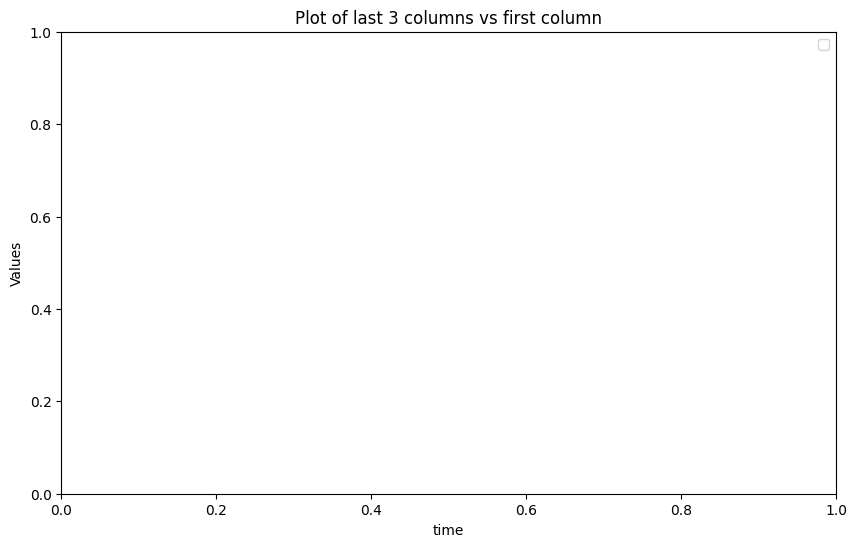

In [4]:
import matplotlib.pyplot as plt

# Plot the last 3 columns vs the first column
plt.figure(figsize=(10,6))
for col in df.columns[-2:-4]:
    # Drop NaN values from x and y arrays simultaneously
    x = df.iloc[:, 0].dropna()
    y = df[col].dropna()
    mask = x.index.isin(y.index)
    x = x[mask]
    y = y[x.index]
    plt.plot(x, y, label=col)

# Set title and labels
plt.title('Plot of last 3 columns vs first column')
plt.xlabel(df.columns[0])
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [5]:
df


,time,capital,consumption,labor,income,rates,wages
0,0,10.000000,0.000039,100.00,50.118723,1.403562,0.350831
1,1,49.114866,0.000064,104.00,83.039978,0.407219,0.558923
2,2,78.121865,0.000074,108.16,98.102134,0.276727,0.634907
